In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

Find the brightest spot

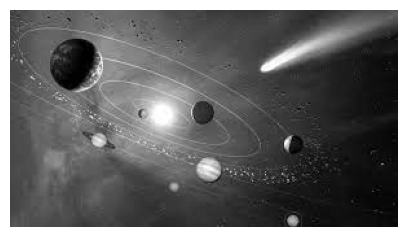

In [3]:
image = cv2.imread('sampel.jpeg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [4]:
#cv2.minMaxLoc is used in finding the min,max vals along with the locations 
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(image)
print(f"Minimum value:{min_val}\nMaximum value:{max_val}\nLocation of maximum value:{max_loc}\nLocation of min value:{min_loc}\n")

Minimum value:0.0
Maximum value:255.0
Location of maximum value:(211, 38)
Location of min value:(2, 0)



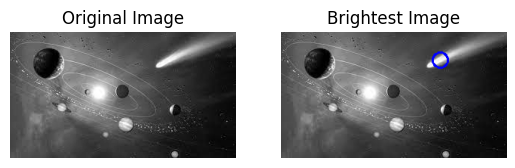

In [8]:
brightest_image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
cv2.circle(brightest_image,max_loc,10,(0,0,255),2)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(brightest_image)
plt.title('Brightest Image')
plt.axis('off')
plt.show()




Linear Filtering 

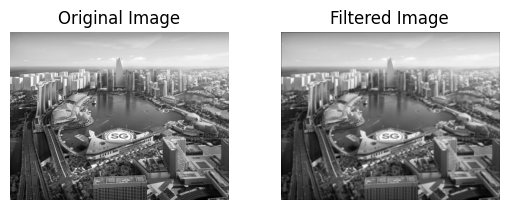

In [18]:
#Linear filtering
#using the average filter 
def apply_linear_filtering(image,kernel):
    image_height, image_width = image.shape 
    kernel_height,kernel_width = kernel.shape
    #pad_height determines the no of pixels needed to be added above and below the original image to accomodate convolution1
    pad_height = kernel_height // 2 
    #pad_width finds the no of pixels needed to be added to accomodate left and right sides of the original image to accomodate convolution 
    pad_width  = kernel_width // 2
    #pad arr with extra rows and colmns 
    #(pad_height,pad_height),(pad_width,pad_width),mode='constant' the tuple specifies the amount of padding to add to each side of the image ,mode =constant means the padding values will be set to 0
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    filtered_image = np.zeros_like(image) #array of 0's with same shape as the image
    for i in range(image_height):
        for j in range(image_width):
            patch = padded_image[i:i+kernel_height,j:j+kernel_width]
            filtered_image[i,j] = np.sum(patch*kernel)
    return filtered_image

image = cv2.imread('mbs.jpg',cv2.IMREAD_GRAYSCALE)
kernel = np.ones((6,6))/36
filtered_image = apply_linear_filtering(image, kernel)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(filtered_image,cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()